In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [30]:
DATASET_PATH = Path('/home/jupyter/datasets')

In [31]:
# Transformations are applied only on training dataset
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)

dls = mask_datablock.dataloaders(DATASET_PATH)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [32]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [33]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.863160,1.336862,0.676056,00:20


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,0.378885,0.618479,0.841820,00:25
1,0.269274,0.250797,0.926327,00:25
2,0.193654,0.302390,0.908992,00:25
3,0.156421,0.228947,0.918743,00:26


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency e

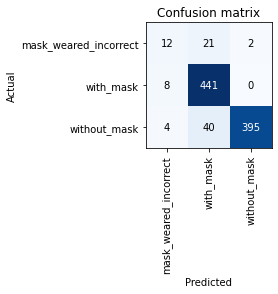

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

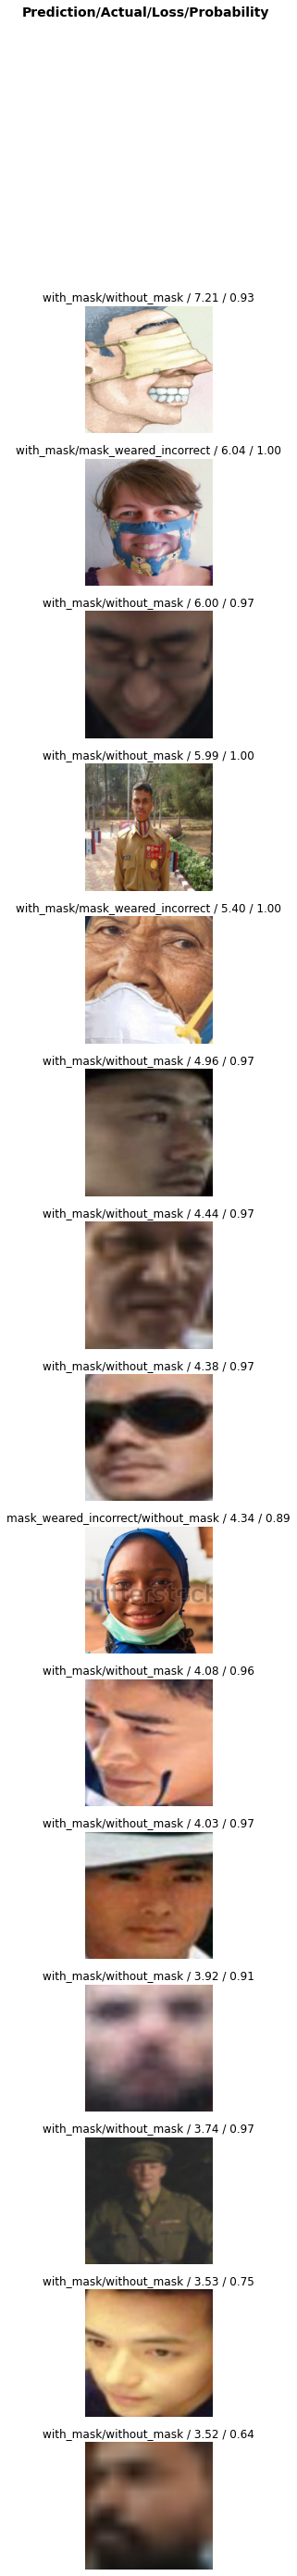

In [35]:
interp.plot_top_losses(15, nrows=15)

In [36]:
learn.export()